### Crop Yield Prediction Model

In this project, we built a machine learning model to predict crop yield based on key agricultural and environmental factors. The crops considered are Yam, Cassava and Rice. The model was built using a dataset containing essential features influencing crop production, such as average rainfall, temperature, and soil quality metrics. 

After extensive data preprocessing and feature engineering, four models were evaluated to identify the best-performing algorithm: Linear Regression, Random Forest, Gradient Boosting, and Support Vector Regressor. 

The evaluation metrics used were Accuracy, Mean Squared Error (MSE), and R² Score Among the tested models, Random Forest achieved the best performance with an accuracy of 95.9% and a significantly low Mean Squared Error of 515,934. 

This model was selected for deployment due to its accuracy and stability. We finally deployed the model on Streamlit to provide an interactive and user-friendly interface, allowing users to input relevant crop data and receive real-time yield predictions. The deployment works effectively, providing farmers and stakeholders with valuable insights into expected crop yields, aiding in better decision-making for crop management and resource allocation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crop_yield = pd.read_csv("FAOSTAT_crop_yield_dataset.csv")
crop_yield.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1961,1961,kg/ha,9466.7,A,Official figure,NaN
1,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1962,1962,kg/ha,8766.5,A,Official figure,NaN
2,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1963,1963,kg/ha,9716.6,A,Official figure,NaN
3,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1964,1964,kg/ha,9174.7,A,Official figure,NaN
4,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1965,1965,kg/ha,9869.7,A,Official figure,NaN


In [4]:
crop_yield.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
181,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540.0,Yams,2018,2018,kg/ha,10199.9,A,Official figure,NaN
182,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540.0,Yams,2019,2019,kg/ha,7806.8,A,Official figure,NaN
183,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540.0,Yams,2020,2020,kg/ha,7904.7,A,Official figure,NaN
184,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540.0,Yams,2021,2021,kg/ha,7986.5,A,Official figure,NaN
185,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540.0,Yams,2022,2022,kg/ha,8175.9,E,Estimated value,NaN


In [5]:
rain_temp = pd.read_csv("Average_rainfal_temp_1961_2022.csv")
rain_temp.head()

,Year,Annual Mean,Annual Temperature
0,1961,1137.82,26.28
1,1962,1356.45,26.68
2,1963,1354.66,27.02
3,1964,1241.07,26.66
4,1965,1201.45,26.56


In [6]:
rain_temp.tail()

,Year,Annual Mean,Annual Temperature
57,2018,1233.04,27.41
58,2019,1296.78,27.29
59,2020,1254.97,27.43
60,2021,1114.97,27.67
61,2022,1228.76,27.15


In [7]:
#merge the 2 datasets
df = pd.merge(crop_yield, rain_temp, on=['Year'])
#dataframe_main = pd.merge(dataframe_yield, draindataframe_rain, on=['Year','Area'])  
df.head()  

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Annual Mean,Annual Temperature
0,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1961,1961,kg/ha,9466.7,A,Official figure,NaN,1137.82,26.28
1,QCL,Crops and livestock products,566,Nigeria,5412,Yield,113.00,Rice,1961,1961,kg/ha,892.6,A,Official figure,NaN,1137.82,26.28
2,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1540.00,Yams,1961,1961,kg/ha,7777.8,E,Estimated value,NaN,1137.82,26.28
3,QCL,Crops and livestock products,566,Nigeria,5412,Yield,1520.01,"Cassava, fresh",1962,1962,kg/ha,8766.5,A,Official figure,NaN,1356.45,26.68
4,QCL,Crops and livestock products,566,Nigeria,5412,Yield,113.00,Rice,1962,1962,kg/ha,1178.9,A,Official figure,NaN,1356.45,26.68


In [8]:
#drop unwanted coulmns
df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element', 'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note', 'Unit', 'Area'], axis = 1, inplace = True) 


In [9]:
df.head()

,Item,Year,Value,Annual Mean,Annual Temperature
0,"Cassava, fresh",1961,9466.7,1137.82,26.28
1,Rice,1961,892.6,1137.82,26.28
2,Yams,1961,7777.8,1137.82,26.28
3,"Cassava, fresh",1962,8766.5,1356.45,26.68
4,Rice,1962,1178.9,1356.45,26.68


In [10]:
#Rename Columns
df.rename(columns={'Value': 'Yield(kg/ha)',
                   'Annual Mean': 'Av_rainfall(mm)',
                  'Annual Temperature': 'Av_temp(0C)',
                  'Item': 'Crop'},
          inplace=True, errors='raise')


In [11]:
df.head()

,Crop,Year,Yield(kg/ha),Av_rainfall(mm),Av_temp(0C)
0,"Cassava, fresh",1961,9466.7,1137.82,26.28
1,Rice,1961,892.6,1137.82,26.28
2,Yams,1961,7777.8,1137.82,26.28
3,"Cassava, fresh",1962,8766.5,1356.45,26.68
4,Rice,1962,1178.9,1356.45,26.68


In [12]:
df.tail()

,Crop,Year,Yield(kg/ha),Av_rainfall(mm),Av_temp(0C)
181,Rice,2021,1931.0,1114.97,27.67
182,Yams,2021,7986.5,1114.97,27.67
183,"Cassava, fresh",2022,6065.5,1228.76,27.15
184,Rice,2022,1856.3,1228.76,27.15
185,Yams,2022,8175.9,1228.76,27.15


In [13]:
df['Crop'].unique()

array(['Cassava, fresh', 'Rice', 'Yams'], dtype=object)

In [14]:
df['Crop'] = df['Crop'].replace({'Cassava, fresh': 'Cassava'})


In [15]:
df['Crop'].unique()

array(['Cassava', 'Rice', 'Yams'], dtype=object)

In [16]:
df.shape

(186, 5)

In [17]:
df.columns

Index(['Crop', 'Year', 'Yield(kg/ha)', 'Av_rainfall(mm)', 'Av_temp(0C)'], dtype='object')

In [18]:
print("Rainfall/Temp Dataset Statistics:")
print(rain_temp.describe())

Rainfall/Temp Dataset Statistics:
              Year  Annual Mean  Annual Temperature
count    62.000000    62.000000           62.000000
mean   1991.500000  1174.544516           27.064194
std      18.041619    90.564505            0.395746
min    1961.000000   888.060000           26.270000
25%    1976.250000  1119.792500           26.817500
50%    1991.500000  1184.070000           27.100000
75%    2006.750000  1240.927500           27.380000
max    2022.000000  1356.450000           27.860000


In [19]:
print("\nCrop Yield Dataset Statistics:")
print(crop_yield.describe())


Crop Yield Dataset Statistics:
       Area Code (M49)  Element Code  Item Code (CPC)    Year Code  \
count            186.0         186.0       186.000000   186.000000   
mean             566.0        5412.0      1057.670000  1991.500000   
std                0.0           0.0       669.835472    17.943831   
min              566.0        5412.0       113.000000  1961.000000   
25%              566.0        5412.0       113.000000  1976.000000   
50%              566.0        5412.0      1520.010000  1991.500000   
75%              566.0        5412.0      1540.000000  2007.000000   
max              566.0        5412.0      1540.000000  2022.000000   

              Year         Value  Note  
count   186.000000    186.000000   0.0  
mean   1991.500000   6932.498925   NaN  
std      17.943831   3951.739011   NaN  
min    1961.000000    892.600000   NaN  
25%    1976.000000   1999.550000   NaN  
50%    1991.500000   8264.050000   NaN  
75%    2007.000000  10308.950000   NaN  
max    20

In [20]:
df.describe()

,Year,Yield(kg/ha),Av_rainfall(mm),Av_temp(0C)
count,186.000000,186.000000,186.000000,186.000000
mean,1991.500000,6932.498925,1174.544516,27.064194
std,17.943831,3951.739011,90.073637,0.393601
min,1961.000000,892.600000,888.060000,26.270000
25%,1976.000000,1999.550000,1116.640000,26.810000
50%,1991.500000,8264.050000,1184.070000,27.100000
75%,2007.000000,10308.950000,1241.070000,27.380000
max,2022.000000,13010.900000,1356.450000,27.860000


In [21]:
df.isnull().sum().sort_values(ascending=False)

Crop               0
Year               0
Yield(kg/ha)       0
Av_rainfall(mm)    0
Av_temp(0C)        0
dtype: int64

In [22]:
df.select_dtypes("number").columns

Index(['Year', 'Yield(kg/ha)', 'Av_rainfall(mm)', 'Av_temp(0C)'], dtype='object')

In [23]:
df.select_dtypes("object").columns

Index(['Crop'], dtype='object')

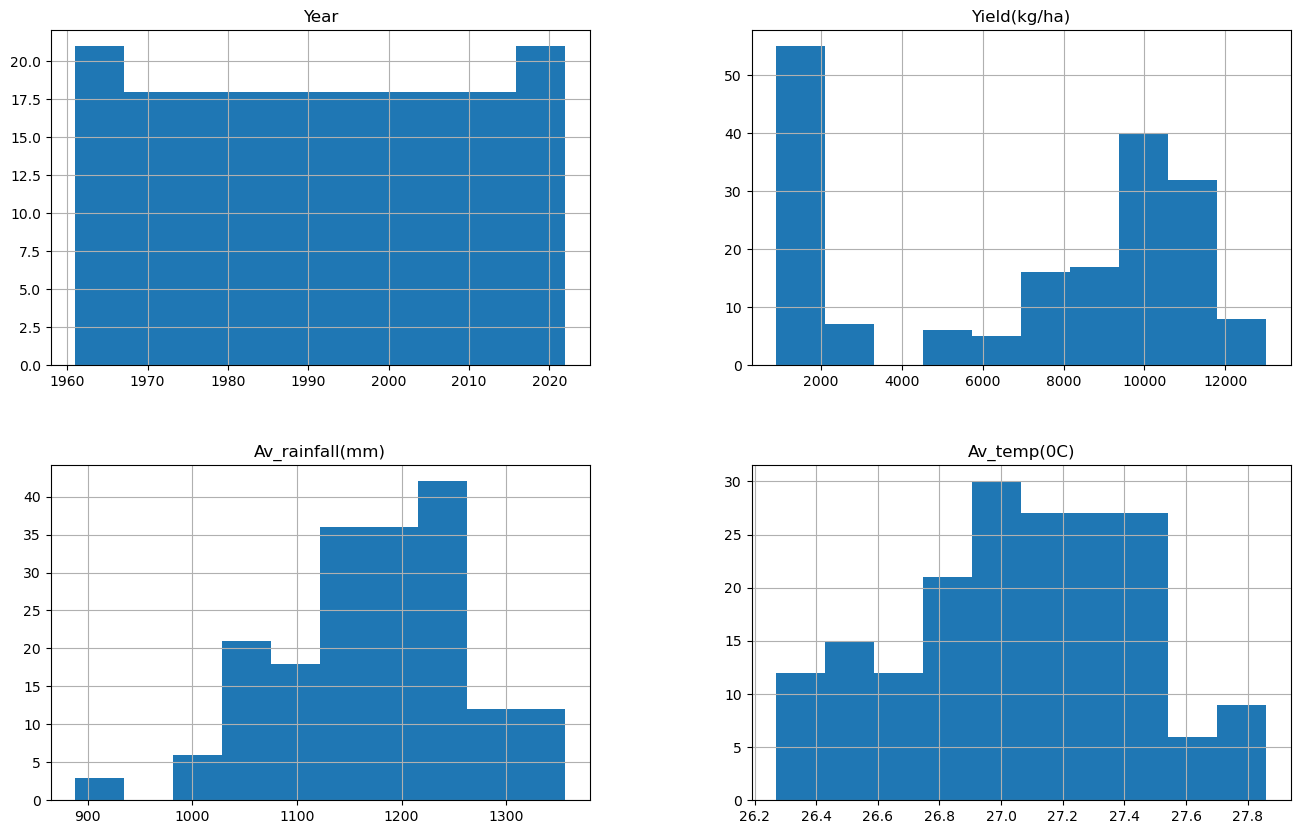

In [24]:
df.hist(figsize=[16,10]);

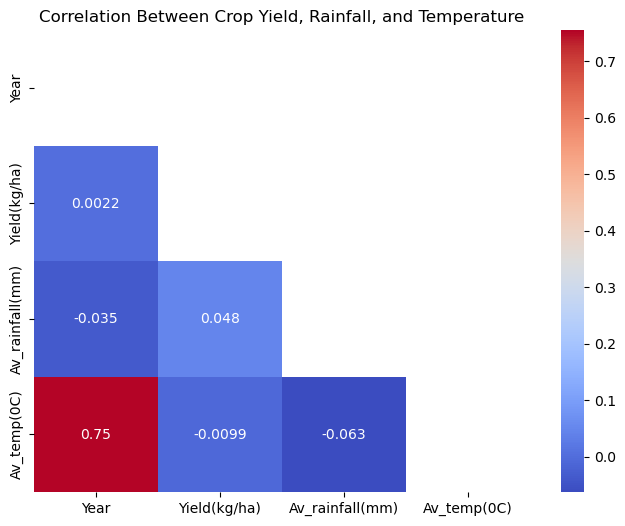

In [25]:
plt.figure(figsize=(8,6))
# using the upper triangle matrix as mask 
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), cmap ="coolwarm", annot=True, mask=matrix)
plt.title('Correlation Between Crop Yield, Rainfall, and Temperature')
plt.show();

There is a corelation between the rainfall and year, as well as the yield and the rain. This means that the more the rainfall, the more yield is expected.

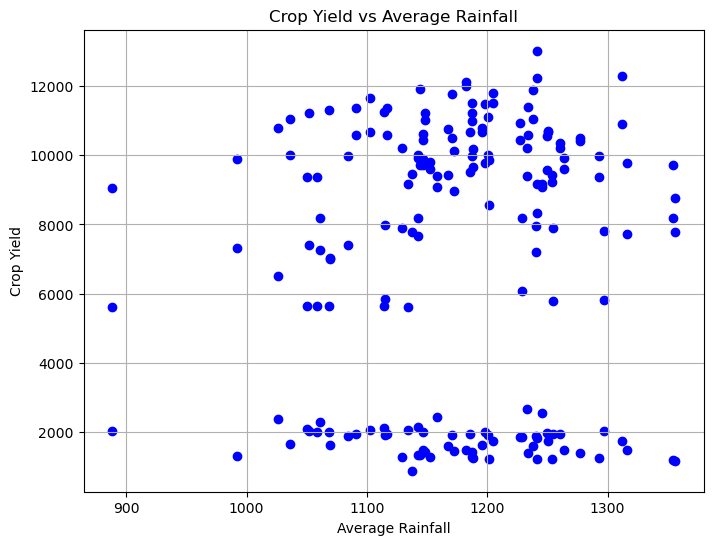

In [26]:
# Scatter plot of crop yield vs rainfall
plt.figure(figsize=(8, 6))
plt.scatter(df['Av_rainfall(mm)'], df['Yield(kg/ha)'], color='blue')
plt.title('Crop Yield vs Average Rainfall')
plt.xlabel('Average Rainfall')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

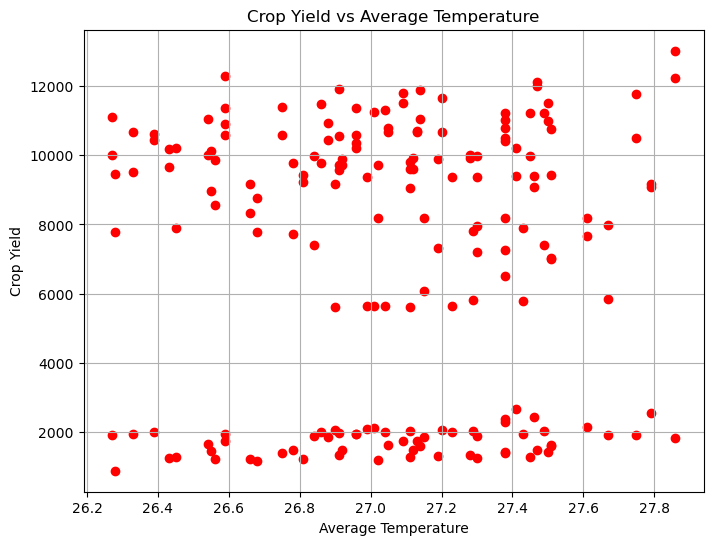

In [27]:
# Scatter plot of crop yield vs temperature
plt.figure(figsize=(8, 6))
plt.scatter(df['Av_temp(0C)'], df['Yield(kg/ha)'], color='red')
plt.title('Crop Yield vs Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

In [28]:
#Find the average crop yield by crop type or year

# Group by year and crop, then calculate mean crop yield
average_yield_by_year = df.groupby('Year')['Yield(kg/ha)'].mean()
average_yield_by_crop = df.groupby('Crop')['Yield(kg/ha)'].mean()

print("\nAverage Crop Yield by Year:")
print(average_yield_by_year)

print("\nAverage Crop Yield by Crop:")
print(average_yield_by_crop)


Average Crop Yield by Year:
Year
1961    6045.700000
1962    5907.733333
1963    6367.366667
1964    6245.700000
1965    6556.600000
           ...     
2018    7424.866667
2019    5226.000000
2020    5210.700000
2021    5251.100000
2022    5365.900000
Name: Yield(kg/ha), Length: 62, dtype: float64

Average Crop Yield by Crop:
Crop
Cassava    9835.191935
Rice       1738.706452
Yams       9223.598387
Name: Yield(kg/ha), dtype: float64


### Model Building

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
to_numeric = {'Cassava': 1, 'Rice': 2, 'Yams': 3}


In [31]:
df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [32]:
df.head()

,Crop,Year,Yield(kg/ha),Av_rainfall(mm),Av_temp(0C)
0,1,1961,9466.7,1137.82,26.28
1,2,1961,892.6,1137.82,26.28
2,3,1961,7777.8,1137.82,26.28
3,1,1962,8766.5,1356.45,26.68
4,2,1962,1178.9,1356.45,26.68


In [33]:
df.head()

,Crop,Year,Yield(kg/ha),Av_rainfall(mm),Av_temp(0C)
0,1,1961,9466.7,1137.82,26.28
1,2,1961,892.6,1137.82,26.28
2,3,1961,7777.8,1137.82,26.28
3,1,1962,8766.5,1356.45,26.68
4,2,1962,1178.9,1356.45,26.68


Building and Evaluating model

In [34]:
# Encode 'Crop' as a categorical feature
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])

In [35]:
# Prepare features and target
X = df[['Crop', 'Year', 'Av_rainfall(mm)', 'Av_temp(0C)']]
y = df['Yield(kg/ha)']

In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The accuracy of the Linear Regression Model Train is 0.60
The accuracy of the  Linear Regression Model Test is -5.01


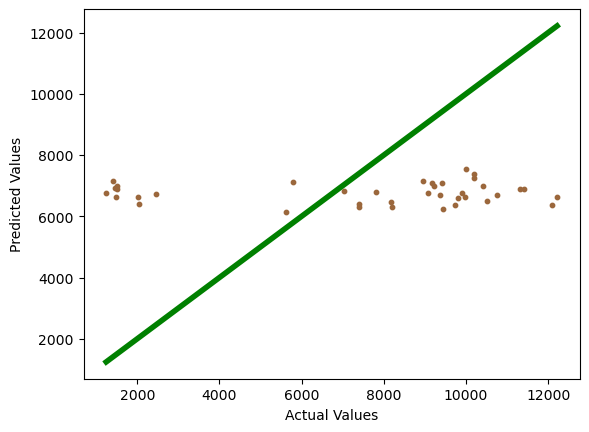

The accuracy of the Random Forest Model Train is 99.07
The accuracy of the  Random Forest Model Test is 95.91


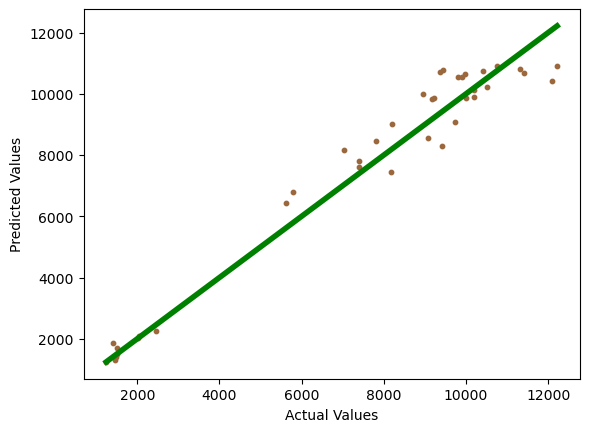

The accuracy of the Gradient Boost Model Train is 98.82
The accuracy of the  Gradient Boost Model Test is 95.77


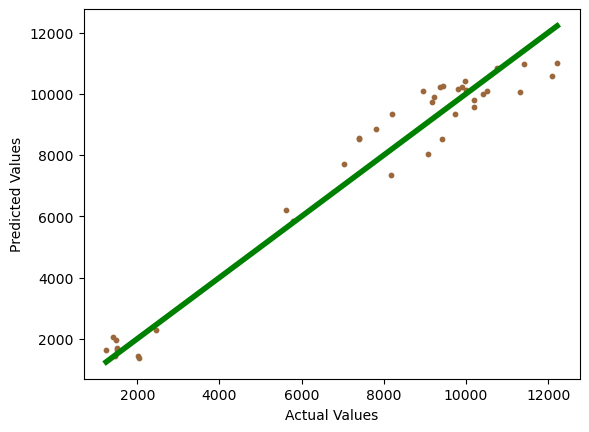

The accuracy of the Support Vector Regressor Model Train is -10.32
The accuracy of the  Support Vector Regressor Model Test is -2.43


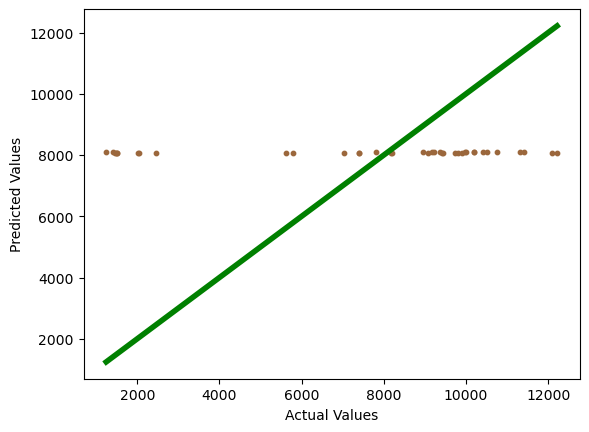

,Model,Accuracy,MSE,R2_score
0,Linear Regression,-0.050113,13239180.319244,-0.050113
1,Random Forest,0.959077,515934.424184,0.959077
2,Gradient Boost,0.957684,533500.046185,0.957684
3,Support Vector Regressor,-0.024350,12914374.334479,-0.024350


In [37]:
results = []

# Initialize models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('Support Vector Regressor', SVR())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()


dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Saving the models for deployment

In [38]:
import joblib

In [39]:
joblib.dump(model, 'random_forest_model.joblib')
print(f"{name} model saved successfully.")
joblib.dump(model, 'gradient_boost_model.joblib')
print(f"{name} model saved successfully.")

Support Vector Regressor model saved successfully.
Support Vector Regressor model saved successfully.


In [41]:
# Saving scaler object with joblib
# Saving scaler object with joblib
scaler_name = 'scaler_object.joblib'
joblib.dump(scaler, scaler_name)

['scaler_object.joblib']